# Comparison of five network designs

In [1]:
# Import standard libraries
from importlib import reload
import csv
import OmicsIntegrator as oi
import networkx as nx
import community 
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
import time
from upsetplot import from_contents, UpSet
from sklearn.cluster import AgglomerativeClustering
from IPython.display import Image
from IPython.core.display import SVG
import gseapy
from gseapy.plot import barplot, dotplot
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import random
import itertools

# Import custom libraries
import pcst_utils as pcst

In [2]:
# Reload modules in case of modifications
reload(pcst)

<module 'pcst_utils' from '/home/braunger/masterthesis/relevant_code/Python/pcst_utils.py'>

In [3]:
# File paths
data_dir = "/home/braunger/masterthesis/data/"
save_dir = "/home/braunger/masterthesis/save/pcst/"
tf_dir = "/home/braunger/masterthesis/save/TF_targets/"
de_dir = "/home/braunger/masterthesis/save/DE_genes/"
fig_dir = "/home/braunger/masterthesis/save/figures/pcst/"

# Design 1

In [4]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 1)
steps = ["1-15_16-26_27-60", "16-26_27-60_61-85", "27-60_61-85_86-96"]
net_stats_d1, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps,
                                                 TFs_with_targets = True, design = 1)

net_stats_d1.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,462,4382,225,74.503311,237,245,47,6
16-26_27-60_61-85,429,3951,204,95.774648,225,241,49,0
27-60_61-85_86-96,465,5070,270,94.405594,195,279,56,4


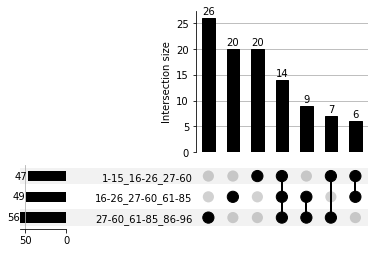

In [5]:
incl_TFs_1 = [[tf[:-4] for tf in net_stats_d1.iloc[net, 9]] for net in range(3)]
shared_TFs_design1 = set.intersection(*map(set,incl_TFs_1))
intersections = from_contents({steps[2]: incl_TFs_1[2], 
                               steps[1]: incl_TFs_1[1],
                               steps[0]: incl_TFs_1[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design1.png')

# Design 2

In [6]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
net_stats_d2, target_counts_d2 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 2)

net_stats_d2.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,529,5320,289,96.333333,240,274,51,6
16-26_27-60_61-85,491,4788,260,96.654275,231,259,59,1
27-60_61-85_86-96,465,5070,270,86.261981,195,279,56,4


In [7]:
pcst.save_net_html(net_dict['200.allTFs.1-15_16-26_27-60'], net_stats_d2.loc['1-15_16-26_27-60', 'incl_TFs'],
                  save_dir, '200.allTFs.1-15_16-26_27-60', '2')
pcst.save_net_html(net_dict['200.allTFs.27-60_61-85_86-96'], net_stats_d2.loc['27-60_61-85_86-96', 'incl_TFs'],
                  save_dir, '200.allTFs.27-60_61-85_86-96', '2')

,protein,transition,name,category,TF,group
0,UBE2D2,tr0,UBE2D2_tr0,Steiner node,No bridge TF,left
1,PPP2CA,tr0,PPP2CA_tr0,Steiner node,No bridge TF,left
2,PLK4,tr1,PLK4_tr1,DE_tr1,No bridge TF,right
3,CTNNB1,tr0,CTNNB1_tr0,Steiner node,No bridge TF,left
4,TRMT112,tr0,TRMT112_tr0,Steiner node,No bridge TF,left
...,...,...,...,...,...,...
460,RPS17,tr0,RPS17_tr0,DE_tr0,No bridge TF,left
461,CCDC85C,tr1,CCDC85C_tr1,DE_tr1,No bridge TF,right
462,SIRT1,tr0,SIRT1_tr0,Steiner node,No bridge TF,left
463,SMAD1,tr0,SMAD1_tr0,DE_tr0,No bridge TF,left


/home/braunger/miniconda3/envs/pcst/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  del sys.path[0]


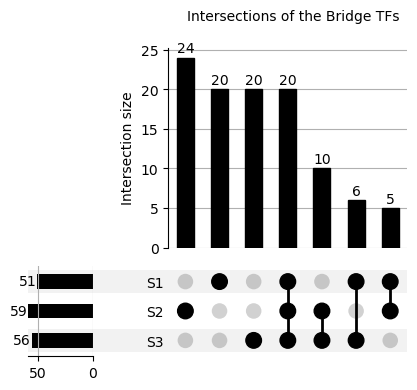

In [8]:
incl_TFs_2 = [[tf[:-4] for tf in net_stats_d2.iloc[net, 9]] for net in range(3)]
shared_TFs_design2 = set.intersection(*map(set,incl_TFs_2))
intersections = from_contents({'S3': incl_TFs_2[2], 
                               'S2': incl_TFs_2[1],
                               'S1': incl_TFs_2[0]})
intersections['S1'] = intersections.index.get_level_values(0)
intersections['S2'] = intersections.index.get_level_values(1)
intersections['S3'] = intersections.index.get_level_values(2)
intersections['group'] = intersections['S1'].astype(str)+'_'+intersections['S2'].astype(str)+'_'+intersections['S3'].astype(str)

intersections['group'] = intersections['group'].astype('category')
intersections['group'].cat.reorder_categories(['False_True_False', 'False_False_True', 'True_False_False', 'True_True_True',
                      'True_True_False', 'True_False_True', 'False_True_True'], inplace=True)
intersections = intersections.sort_values(by = 'group')

matplotlib.rc_file_defaults()
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by=None, min_subset_size = 2, sort_categories_by=None).plot()
plt.figtext(0.45, 0.95, 'Intersections of the Bridge TFs')
plt.savefig(fig_dir+'intersections_design2.png', dpi = 500, bbox_inches="tight")

In [9]:
# save incl TFs as dataframe
incl_TFs_df = pd.DataFrame({'TF': list(itertools.chain(*incl_TFs_2)), 
                            'net': list(itertools.chain(*[['young_net'] * len(incl_TFs_2[0]), 
                                                          ['middle_net'] * len(incl_TFs_2[1]), 
                                                          ['old_net'] * len(incl_TFs_2[2])]))})
incl_TFs_df.to_csv(save_dir + 'incl_TFs_design2.csv', index = False)

# Design 3

In [10]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 3)
net_stats_d3, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 3)

net_stats_d3.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,533,5761,294,97.674419,239,274,50,6
16-26_27-60_61-85,495,5444,263,98.134328,232,259,60,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


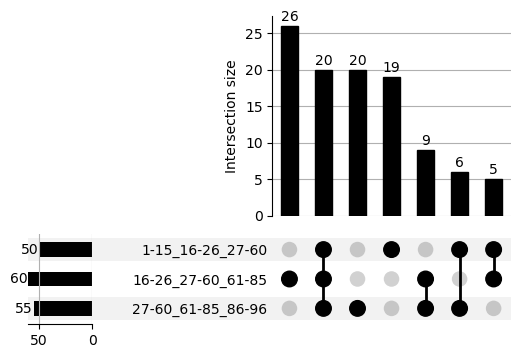

In [11]:
incl_TFs_3 = [[tf[:-4] for tf in net_stats_d3.iloc[net, 9]] for net in range(3)]
shared_TFs_design3 = set.intersection(*map(set,incl_TFs_3))
intersections = from_contents({steps[2]: incl_TFs_3[2], 
                               steps[1]: incl_TFs_3[1],
                               steps[0]: incl_TFs_3[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design3.png')

# Design 4

In [12]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 4)
net_stats_d4, target_counts_d4 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 4)

net_stats_d4.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,565,6456,309,98.722045,256,303,55,6
16-26_27-60_61-85,514,5846,261,97.388060,253,287,74,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


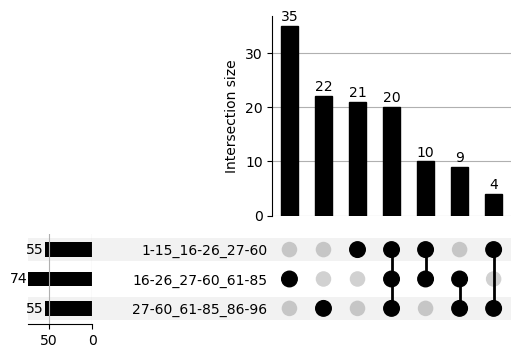

In [13]:
incl_TFs_4 = [[tf[:-4] for tf in net_stats_d4.iloc[net, 9]] for net in range(3)]
shared_TFs_design4 = set.intersection(*map(set,incl_TFs_4))
intersections = from_contents({steps[2]: incl_TFs_4[2], 
                               steps[1]: incl_TFs_4[1],
                               steps[0]: incl_TFs_4[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design4.png')

# Design 5

In [14]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 5)
net_stats_d5, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 5)

net_stats_d5.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,740,11573,494,102.277433,246,305,58,6
16-26_27-60_61-85,666,10414,418,103.209877,248,287,78,1
27-60_61-85_86-96,470,5662,276,96.503497,194,279,55,4


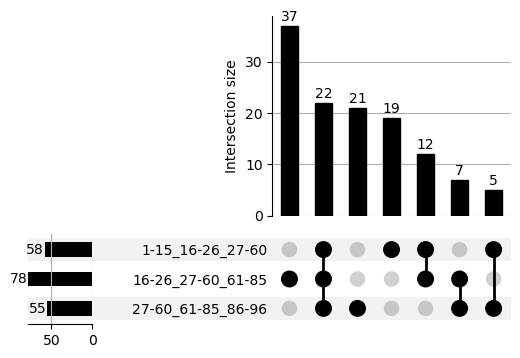

In [15]:
incl_TFs_5 = [[tf[:-4] for tf in net_stats_d5.iloc[net, 9]] for net in range(3)]
shared_TFs_design5 = set.intersection(*map(set,incl_TFs_5))
intersections = from_contents({steps[2]: incl_TFs_5[2], 
                               steps[1]: incl_TFs_5[1],
                               steps[0]: incl_TFs_5[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design5.png')

# Comparison of the five designs

## TFs shared between all networks

In [16]:
# Numbers of TFs per design
pd.concat([net_stats_d1['n_incl_TFs'].rename("design_1"), 
          net_stats_d2['n_incl_TFs'].rename("design_2"), 
          net_stats_d3['n_incl_TFs'].rename("design_3"),
          net_stats_d4['n_incl_TFs'].rename("design_4"),
          net_stats_d5['n_incl_TFs'].rename("design_5")], axis = 1)

,design_1,design_2,design_3,design_4,design_5
1-15_16-26_27-60,47,51,50,55,58
16-26_27-60_61-85,49,59,60,74,78
27-60_61-85_86-96,56,56,55,55,55


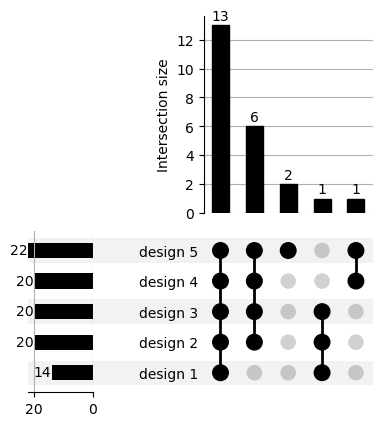

In [17]:
# How strongly do the TFs that occur in all 3 networks overlap?
intersections = from_contents({'design 1': shared_TFs_design1, 
                               'design 2': shared_TFs_design2,
                               'design 3': shared_TFs_design3,
                               'design 4': shared_TFs_design4,
                               'design 5': shared_TFs_design5})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_all-designs.png', dpi = 500, bbox_inches="tight")

In [18]:
set.intersection(shared_TFs_design1, 
                 shared_TFs_design2,
                 shared_TFs_design3,
                 shared_TFs_design4, 
                 shared_TFs_design5)

{'AHR',
 'ATF1',
 'FOXO3',
 'GTF2B',
 'HDAC1',
 'HIF1A',
 'MAZ',
 'NOTCH1',
 'NR2C2',
 'POLR2A',
 'SRC',
 'STAT1',
 'ZNF384'}

In [19]:
shared_TFs_design2

{'AHR',
 'ATF1',
 'FLI1',
 'FOXO3',
 'GATA2',
 'GTF2B',
 'HDAC1',
 'HIF1A',
 'HOXA6',
 'KLF3',
 'MAZ',
 'NCOR1',
 'NOTCH1',
 'NR2C2',
 'POLR2A',
 'SRC',
 'STAT1',
 'STAT3',
 'TCF7L2',
 'ZNF384'}

## Young-specific TFs

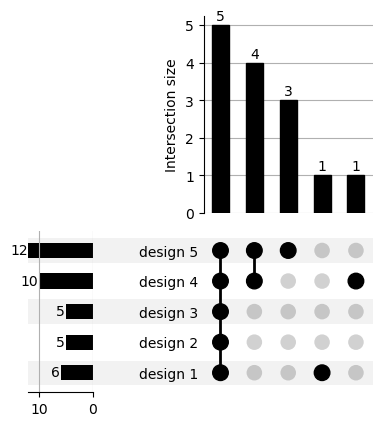

In [20]:
def young_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[:2])).difference(set(incl_TFs[2]))

intersections = from_contents({'design 1': young_specific_TFs(incl_TFs_1), 
                               'design 2': young_specific_TFs(incl_TFs_2),
                               'design 3': young_specific_TFs(incl_TFs_3),
                               'design 4': young_specific_TFs(incl_TFs_4),
                               'design 5': young_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'young_specific_TFs.png', dpi = 500, bbox_inches="tight")

In [21]:
set.intersection(young_specific_TFs(incl_TFs_1), 
                 young_specific_TFs(incl_TFs_2),
                 young_specific_TFs(incl_TFs_3),
                 young_specific_TFs(incl_TFs_4), 
                 young_specific_TFs(incl_TFs_5))

{'BRCA1', 'CREBBP', 'ERG', 'LYL1', 'SMAD3'}

## Old-specific TFs

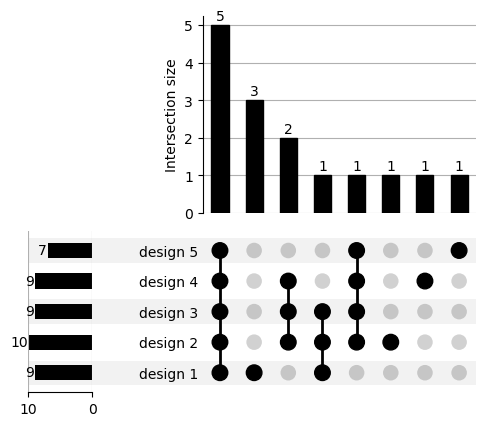

In [22]:
def old_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[1:3])).difference(set(incl_TFs[0]))

intersections = from_contents({'design 1': old_specific_TFs(incl_TFs_1), 
                               'design 2': old_specific_TFs(incl_TFs_2),
                               'design 3': old_specific_TFs(incl_TFs_3),
                               'design 4': old_specific_TFs(incl_TFs_4),
                               'design 5': old_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'old_specific_TFs.png', dpi = 500, bbox_inches="tight")

In [23]:
set.intersection(old_specific_TFs(incl_TFs_1), 
                 old_specific_TFs(incl_TFs_2),
                 old_specific_TFs(incl_TFs_3),
                 old_specific_TFs(incl_TFs_4), 
                 old_specific_TFs(incl_TFs_5))

{'CTCF', 'GABPA', 'MAFF', 'RBBP5', 'SIX5'}

## TFs in the first network

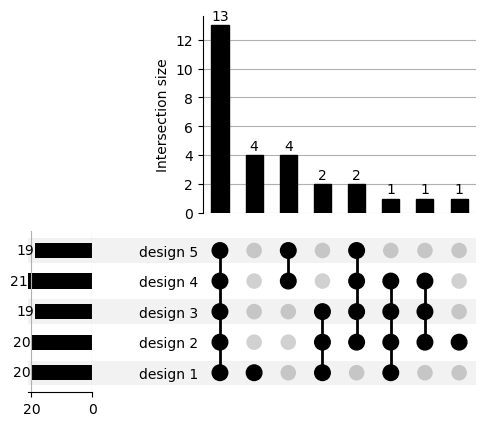

In [24]:
def first_net_TFs(incl_TFs):
    return set(incl_TFs[0]).difference(set.union(*map(set,[incl_TFs[i] for i in [1, 2]])))

intersections = from_contents({'design 1': first_net_TFs(incl_TFs_1), 
                               'design 2': first_net_TFs(incl_TFs_2),
                               'design 3': first_net_TFs(incl_TFs_3),
                               'design 4': first_net_TFs(incl_TFs_4),
                               'design 5': first_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'first_net_TFs.png', dpi = 500, bbox_inches="tight")

In [25]:
set.intersection(first_net_TFs(incl_TFs_1), 
                 first_net_TFs(incl_TFs_2),
                 first_net_TFs(incl_TFs_3),
                 first_net_TFs(incl_TFs_4), 
                 first_net_TFs(incl_TFs_5))

{'CDK7',
 'CTNNB1',
 'EP300',
 'GLI2',
 'HOXA13',
 'MAX',
 'MEIS1',
 'MYBL2',
 'NR5A2',
 'RNF2',
 'SIN3A',
 'TEAD4',
 'TFAP2C'}

## TFs in the second network

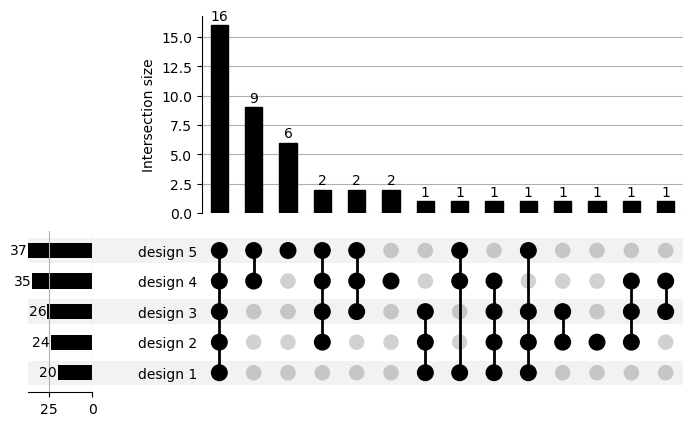

In [26]:
def second_net_TFs(incl_TFs):
    return set(incl_TFs[1]).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 2]])))

intersections = from_contents({'design 1': second_net_TFs(incl_TFs_1), 
                               'design 2': second_net_TFs(incl_TFs_2),
                               'design 3': second_net_TFs(incl_TFs_3),
                               'design 4': second_net_TFs(incl_TFs_4),
                               'design 5': second_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'second_net_TFs.png', dpi = 500, bbox_inches="tight")

In [27]:
set.intersection(second_net_TFs(incl_TFs_1), 
                 second_net_TFs(incl_TFs_2),
                 second_net_TFs(incl_TFs_3),
                 second_net_TFs(incl_TFs_4), 
                 second_net_TFs(incl_TFs_5))

{'ATF3',
 'CHD4',
 'E2F4',
 'ELK3',
 'ETV1',
 'MECOM',
 'RXRA',
 'SP1',
 'VEZF1',
 'WDR5',
 'YY1',
 'ZBTB33',
 'ZEB1',
 'ZFX',
 'ZNF76',
 'ZNF83'}

## TFs in the last network

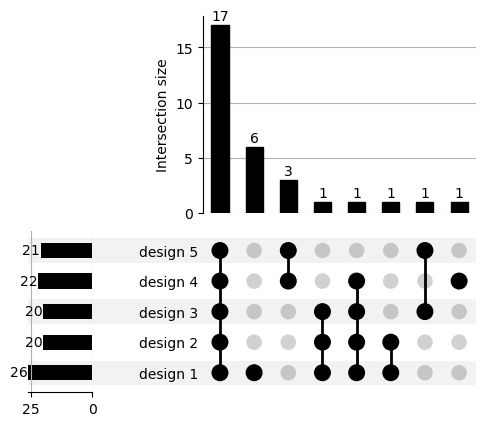

In [28]:
def last_net_TFs(incl_TFs):
    return set(incl_TFs[2]).difference(set.union(*map(set,incl_TFs[0:2])))

intersections = from_contents({'design 1': last_net_TFs(incl_TFs_1), 
                               'design 2': last_net_TFs(incl_TFs_2),
                               'design 3': last_net_TFs(incl_TFs_3),
                               'design 4': last_net_TFs(incl_TFs_4),
                               'design 5': last_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'last_net_TFs.png', dpi = 500, bbox_inches="tight")

In [29]:
set.intersection(last_net_TFs(incl_TFs_1), 
                 last_net_TFs(incl_TFs_2),
                 last_net_TFs(incl_TFs_3),
                 last_net_TFs(incl_TFs_4), 
                 last_net_TFs(incl_TFs_5))

{'ARNT',
 'BMI1',
 'BRD2',
 'CDK9',
 'CLOCK',
 'DDX5',
 'E2F1',
 'FOS',
 'GLIS1',
 'KDM1A',
 'MYH11',
 'NR3C1',
 'ORC1',
 'SMAD2',
 'TAF3',
 'THAP11',
 'TRIM24'}